In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string #library that contains sets of punctuation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import defaultdict
from sklearn.model_selection import train_test_split

## Basic producing of n-grams with ngrams function in `nltk.util` module

In [2]:
# Quickly generate n-grams with ngrams function in nltk.util module

from nltk.util import ngrams

sentence = "Natural Language Processing using N-grams is incredibly awesome."

n = 3 # Change this value to generate any n-gram of size n of your choice

trigrams = ngrams(sentence.split(), n)

for item in trigrams:
    print(item)

('Natural', 'Language', 'Processing')
('Language', 'Processing', 'using')
('Processing', 'using', 'N-grams')
('using', 'N-grams', 'is')
('N-grams', 'is', 'incredibly')
('is', 'incredibly', 'awesome.')


# Import and read the dataset and continue...

[This Dataset](https://medium.com/r/?url=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fsbhatti%2Ffinancial-sentiment-analysis) is available on [Kaggle](www.kaggle.com)

In [3]:
data = pd.read_csv('Financial_Sentiment.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB
None


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
#Check what sentiments we have

data['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [5]:
# check counts for each sentiment

data['Sentiment'].unique(), data['Sentiment'].value_counts()

(array(['positive', 'negative', 'neutral'], dtype=object),
 neutral     3130
 positive    1852
 negative     860
 Name: Sentiment, dtype: int64)

In [6]:
# Check for null values

data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

## Word cloud to check the most used words

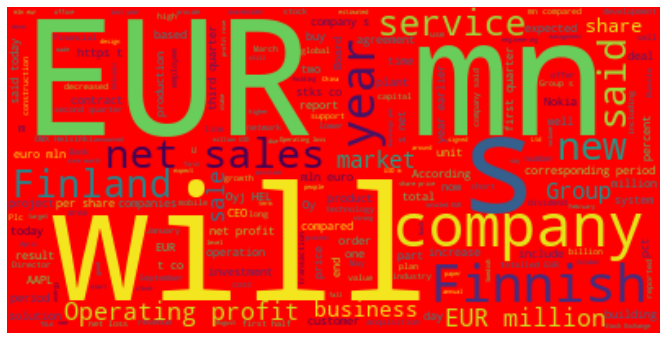

In [7]:
from wordcloud import WordCloud

text = " ".join([x for x in data['Sentence']])

wordcloud = WordCloud(background_color='red').generate(text)

plt.figure(figsize=(55,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
X = data['Sentence']
y = data['Sentiment']
y

0       positive
1       negative
2       positive
3        neutral
4        neutral
          ...   
5837    negative
5838     neutral
5839     neutral
5840     neutral
5841    positive
Name: Sentiment, Length: 5842, dtype: object

### Split the data into train and test sets

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)

In [10]:
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [11]:
# type(y_train)

In [12]:
# when we combine the X_train and the y_train we get the train set
# Similarly if we combine the X_test and y_test we get the test set
# This is just for practice but applicable

# df1 = pd.DataFrame(X_train)
# df2 = pd.DataFrame(y_train)

# train_set = pd.concat([df1, df2], axis=1)

# train_set

In [13]:
# This is the method I have used to get the train and test set
# It is much simpler and gives same results like what we would have got above

train_set, test_set = train_test_split(data, test_size=0.20, random_state=42)

train_set.shape, test_set.shape

((4673, 2), (1169, 2))

In [14]:
train_set

,Sentence,Sentiment
1647,The floor area of the Yliopistonrinne project ...,neutral
1669,"no compensation for its news , opinions or dis...",neutral
3159,RT @ACInvestorBlog $AAPL still on track for $500,positive
4577,This includes a EUR 39.5 mn change in the fair...,neutral
4221,$GTE LONG at 7.44,positive
...,...,...
3772,@BULLYA @pollux654321 My 50 $KORS 80 Calls are...,positive
5191,"According to Sepp+ñnen , the new technology UM...",positive
5226,$CRUS Upgraded to a buy by Alpha Street Research,positive
5390,Favourable currency rates also contributed to ...,positive


In [15]:
# from nltk.tokenize import sent_tokenize, word_tokenize

# textt = 'Natural language processing is awesome area. Huge budget have been allocated for this.'

# sent_tokenize(textt)

In [16]:
# word_tokenize(textt)

In [17]:
# wordd = [word for word in stopwords.words("english") if word == 'igs']
# print(wordd)

### Create a function responsible for preprocessing the dataset and generate n-gram of any size

In [18]:
# Let's generate the n-grams

def generate_ngrams(sentence, ngram=1):
    # first lets convert the senetence into lower case
    sentence_lower = sentence.lower()
    sentence = re.sub(r'[^a-zA-Z0-9\s]', ' ', sentence_lower)
    
    # Remove stopwords, and punctuation
    stop = set(stopwords.words('english') + list(string.punctuation))
    
    # tokenize and display tokenized sentence
    clean_words = [i for i in word_tokenize(sentence) if i not in stop]
#     print(f"\n===Tokens:=== \n{clean_words}\n")
    
    # Generate the n-grams of any size
    ngrams = zip(*[clean_words[i:] for i in range(ngram)])
    return [" ".join(ngram) for ngram in ngrams]    

In [19]:
# TEST
# Generate n-grams of N=4 from the text
texts = 'Natural language Processing(NLP) is an awesome task! Learn N-grams today!'
generate_ngrams(texts,4)

['natural language processing nlp',
 'language processing nlp awesome',
 'processing nlp awesome task',
 'nlp awesome task learn',
 'awesome task learn n',
 'task learn n grams',
 'learn n grams today']

In [21]:
# Test for picking a sentences on particulat sentiment
train_set[train_set['Sentiment']=='positive']['Sentence']

3159     RT @ACInvestorBlog $AAPL still on track for $500
4221                                    $GTE LONG at 7.44
4398    The diluted loss per share narrowed to EUR 0.2...
457     $BBRY bye bye Sammy. Hello BB. Sounds like we'...
479     In the beginning of this year , Wartsila had s...
                              ...                        
3772    @BULLYA @pollux654321 My 50 $KORS 80 Calls are...
5191    According to Sepp+ñnen , the new technology UM...
5226     $CRUS Upgraded to a buy by Alpha Street Research
5390    Favourable currency rates also contributed to ...
860     Tesco breaks its downward slide by cutting sal...
Name: Sentence, Length: 1480, dtype: object

### Logic

1. Initialize a dictionary to store the words together with their counts
    positiveWords=defaultdict(int)
2. traverse the dataframe pick sentences with positive sentiment

    2.1. traverse through sentences and pick each word and preprocess them with the generate_ngrams()          function we created
    
        2.1.1 store the words in a defaultdict 
3. convert the dictionary into a df

In [73]:
# Initialize the dictionaries

positiveWords=defaultdict(int)
negativeWords=defaultdict(int)
neutralWords=defaultdict(int)

# Creating Unigrams

In [23]:
# Creating positive unigrams
for text in train_set[train_set['Sentiment']=='positive']['Sentence']:
    for word in generate_ngrams(text):
        positiveWords[word]+=1
df_positive = pd.DataFrame(sorted(positiveWords.items(),key=lambda x:x[1],reverse=True))

df_positive

,0,1
0,eur,357
1,mn,192
2,year,180
3,sales,178
4,profit,162
...,...,...
5008,crus,1
5009,alpha,1
5010,contributed,1
5011,downward,1


In [24]:
# Creating negative unigrams
for text in train_set[train_set['Sentiment']=='negative']['Sentence']:
    for word in generate_ngrams(text):
        negativeWords[word]+=1
df_negative = pd.DataFrame(sorted(negativeWords.items(),key=lambda x:x[1],reverse=True))
df_negative

,0,1
0,eur,259
1,mn,181
2,profit,121
3,2,95
4,1,95
...,...,...
2728,comes,1
2729,f55dx4aegi,1
2730,siga,1
2731,reargument,1


In [25]:
# Creating neutral unigrams

for text in train_set[train_set['Sentiment']=='neutral']['Sentence']:
    for word in generate_ngrams(text):
        neutralWords[word]+=1
df_neutral = pd.DataFrame(sorted(neutralWords.items(),key=lambda x:x[1],reverse=True))
df_neutral

,0,1
0,eur,446
1,company,414
2,1,254
3,mn,227
4,finnish,215
...,...,...
7086,castle,1
7087,willich,1
7088,pressplate,1
7089,prefab,1


In [26]:
plt.rcParams.update({'font.size': 10})

(0.0, 500.0)

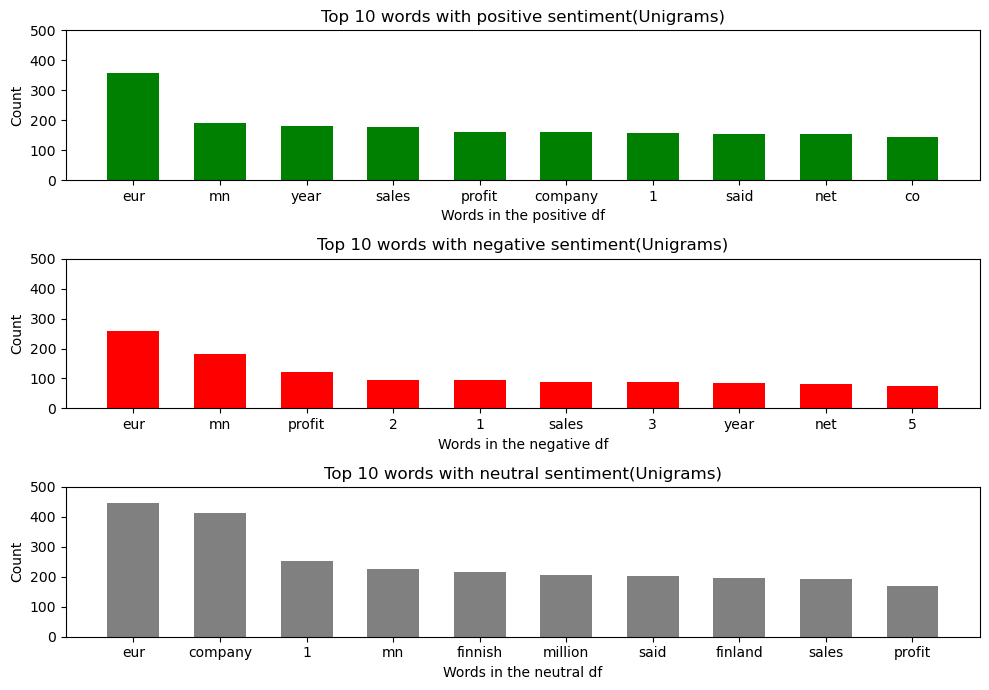

In [27]:
x_positive = df_positive[0][:10]
y_positive = df_positive[1][:10]

x_negative = df_negative[0][:10]
y_negative = df_negative[1][:10]

x_neutral = df_neutral[0][:10]
y_neutral = df_neutral[1][:10]


fig, ax = plt.subplots(3, 1, figsize=(10, 7), layout='tight', dpi=100)

ax[0].bar(x_positive, y_positive, color='g', width= 0.6)
ax[0].set_title('Top 10 words with positive sentiment(Unigrams)')
ax[0].set_xlabel('Words in the positive df')
ax[0].set_ylabel('Count')

ax[1].bar(x_negative, y_negative, color='r', width= 0.6)
ax[1].set_title('Top 10 words with negative sentiment(Unigrams)')
ax[1].set_xlabel('Words in the negative df')
ax[1].set_ylabel('Count')

ax[2].bar(x_neutral, y_neutral, color='gray', width= 0.6)
ax[2].set_title('Top 10 words with neutral sentiment(Unigrams)')
ax[2].set_xlabel('Words in the neutral df')
ax[2].set_ylabel('Count')

ax[0].set_ylim(0, 500)
ax[1].set_ylim(0, 500)
ax[2].set_ylim(0, 500)


# Creating Bigrams

In [28]:
positiveWords_bi=defaultdict(int)
negativeWords_bi=defaultdict(int)
neutralWords_bi=defaultdict(int)

In [29]:
# Creating positive bigrams

for text in train_set[train_set['Sentiment']=='positive']['Sentence']:
    for word in generate_ngrams(text, 2):
        positiveWords_bi[word]+=1
df_positive_bi = pd.DataFrame(sorted(positiveWords_bi.items(),key=lambda x:x[1],reverse=True))
df_positive_bi

,0,1
0,net sales,80
1,operating profit,77
2,http stks,73
3,stks co,73
4,https co,62
...,...,...
14097,downward slide,1
14098,slide cutting,1
14099,cutting sales,1
14100,sales decline,1


In [30]:
# Creating negative bigrams

for text in train_set[train_set['Sentiment']=='negative']['Sentence']:
    for word in generate_ngrams(text, 2):
        negativeWords_bi[word]+=1
df_negative_bi = pd.DataFrame(sorted(negativeWords_bi.items(),key=lambda x:x[1],reverse=True))
df_negative_bi

,0,1
0,operating profit,42
1,mn eur,39
2,https co,36
3,net sales,36
4,corresponding period,34
...,...,...
6185,year eur,1
6186,siga bid,1
6187,bid reargument,1
6188,reargument denied,1


In [31]:
# Creating neutral bigrams

for text in train_set[train_set['Sentiment']=='neutral']['Sentence']:
    for word in generate_ngrams(text, 2):
        neutralWords_bi[word]+=1
df_neutral_bi = pd.DataFrame(sorted(neutralWords_bi.items(),key=lambda x:x[1],reverse=True))
df_neutral_bi

,0,1
0,net sales,104
1,operating profit,69
2,mln euro,51
3,mn eur,43
4,eur 0,41
...,...,...
24037,avesta plate,1
24038,plate service,1
24039,service centre,1
24040,centre nordic,1


In [39]:
plt.rcParams.update({'font.size': 9})

## Visualize the bigrams count

0               net sales
1        operating profit
2               http stks
3                 stks co
4                https co
5                  mn eur
6    corresponding period
7                   eur 0
8              net profit
9             profit rose
Name: 0, dtype: object


(0.0, 200.0)

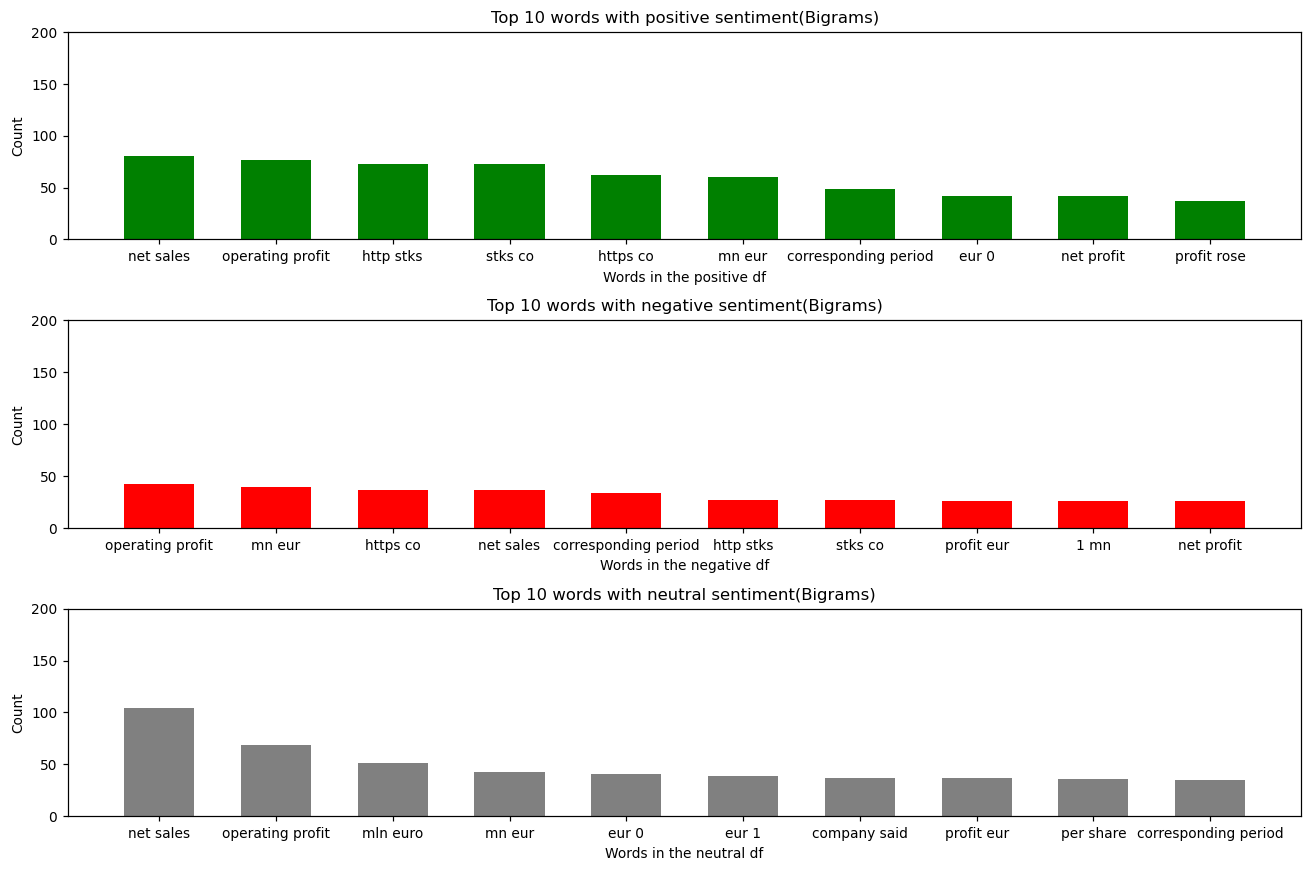

In [41]:
x_positive_bi = df_positive_bi[0][:10]
y_positive_bi = df_positive_bi[1][:10]

print(x_positive_bi)
x_negative_bi = df_negative_bi[0][:10]
y_negative_bi = df_negative_bi[1][:10]

x_neutral_bi = df_neutral_bi[0][:10]
y_neutral_bi = df_neutral_bi[1][:10]


fig, ax = plt.subplots(3, 1, figsize=(12, 8), layout='tight', dpi=110)

ax[0].bar(x_positive_bi, y_positive_bi, color='g', width= 0.6)
ax[0].set_title('Top 10 words with positive sentiment(Bigrams)')
ax[0].set_xlabel('Words in the positive df')
ax[0].set_ylabel('Count')

ax[1].bar(x_negative_bi, y_negative_bi, color='r', width= 0.6)
ax[1].set_title('Top 10 words with negative sentiment(Bigrams)')
ax[1].set_xlabel('Words in the negative df')
ax[1].set_ylabel('Count')

ax[2].bar(x_neutral_bi, y_neutral_bi, color='gray', width= 0.6)
ax[2].set_title('Top 10 words with neutral sentiment(Bigrams)')
ax[2].set_xlabel('Words in the neutral df')
ax[2].set_ylabel('Count')

ax[0].set_ylim(0, 200)
ax[1].set_ylim(0, 200)
ax[2].set_ylim(0, 200)


# Creating Trigrams

In [34]:
positiveWords_tri=defaultdict(int)
negativeWords_tri=defaultdict(int)
neutralWords_tri=defaultdict(int)

In [35]:
# Creating positive trigrams

for text in train_set[train_set['Sentiment']=='positive']['Sentence']:
    for word in generate_ngrams(text, 3):
        positiveWords_tri[word]+=1
df_positive_tri = pd.DataFrame(sorted(positiveWords_tri.items(),key=lambda x:x[1],reverse=True))
df_positive_tri

,0,1
0,http stks co,73
1,mn corresponding period,24
2,profit rose eur,23
3,first nine months,20
4,operating profit rose,19
...,...,...
15271,breaks downward slide,1
15272,downward slide cutting,1
15273,slide cutting sales,1
15274,cutting sales decline,1


In [42]:
# Creating negative trigrams

for text in train_set[train_set['Sentiment']=='negative']['Sentence']:
    for word in generate_ngrams(text, 3):
        negativeWords_tri[word]+=1
df_negative_tri = pd.DataFrame(sorted(negativeWords_tri.items(),key=lambda x:x[1],reverse=True))
df_negative_tri

,0,1
0,http stks co,27
1,mn corresponding period,18
2,compared profit eur,14
3,mn third quarter,10
4,earnings per share,10
...,...,...
6809,compared eur 11,1
6810,11 2 million,1
6811,siga bid reargument,1
6812,bid reargument denied,1


In [44]:
# # Creating neutral trigrams

for text in train_set[train_set['Sentiment']=='neutral']['Sentence']:
    for word in generate_ngrams(text, 3):
        neutralWords_tri[word]+=1
df_neutral_tri = pd.DataFrame(sorted(neutralWords_tri.items(),key=lambda x:x[1],reverse=True))
df_neutral_tri

,0,1
0,mn corresponding period,40
1,net sales eur,32
2,compared profit eur,28
3,earnings per share,24
4,operating profit eur,24
...,...,...
26066,prefab avesta plate,2
26067,avesta plate service,2
26068,plate service centre,2
26069,service centre nordic,2


In [70]:
plt.rcParams.update({'font.size': 8})

## Visualize the trigram counts

(0.0, 100.0)

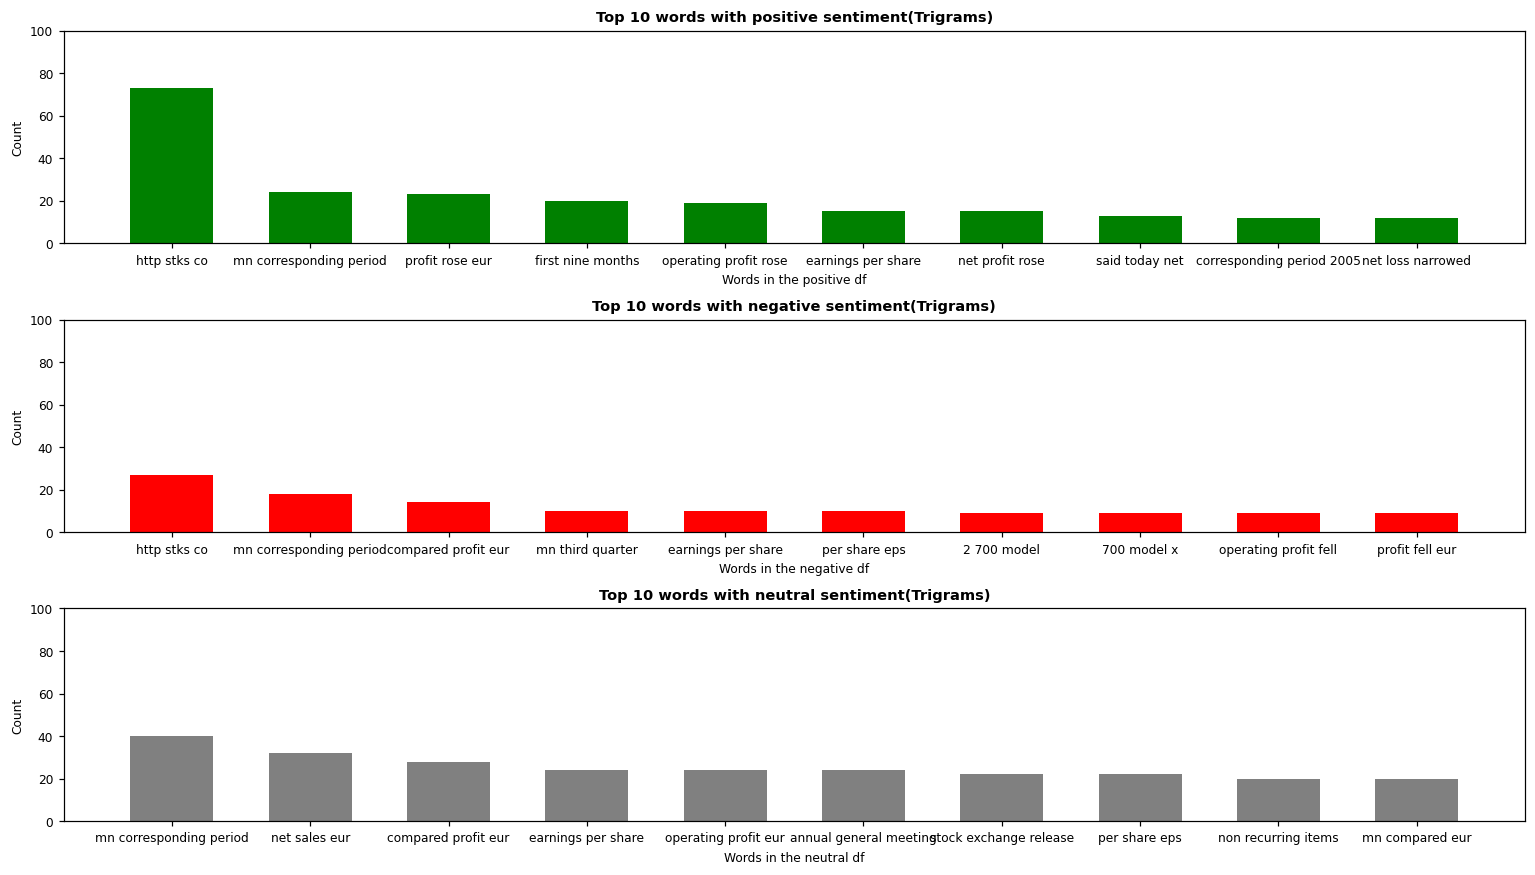

In [71]:
x_positive_tri = df_positive_tri[0][:10]
y_positive_tri = df_positive_tri[1][:10]

x_negative_tri = df_negative_tri[0][:10]
y_negative_tri = df_negative_tri[1][:10]

x_neutral_tri = df_neutral_tri[0][:10]
y_neutral_tri = df_neutral_tri[1][:10]


fig, ax = plt.subplots(3, 1, figsize=(14, 8), layout='tight', dpi=110)

ax[0].bar(x_positive_tri, y_positive_tri, color='g', width= 0.6)
ax[0].set_title('Top 10 words with positive sentiment(Trigrams)', fontweight='bold')
ax[0].set_xlabel('Words in the positive df')
ax[0].set_ylabel('Count')

ax[1].bar(x_negative_tri, y_negative_tri, color='r', width= 0.6)
ax[1].set_title('Top 10 words with negative sentiment(Trigrams)' , fontweight='bold')
ax[1].set_xlabel('Words in the negative df')
ax[1].set_ylabel('Count')

ax[2].bar(x_neutral_tri, y_neutral_tri, color='gray', width= 0.6)
ax[2].set_title('Top 10 words with neutral sentiment(Trigrams)', fontweight='bold')
ax[2].set_xlabel('Words in the neutral df')
ax[2].set_ylabel('Count')

ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)
ax[2].set_ylim(0, 100)